# Importing Python Packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from numpy import int64
import datetime as dt
import scipy.stats
import seaborn as sns 
import statsmodels
import sklearn
from tabulate import tabulate


# Importing Data set

In [2]:
df_raw= pd.read_csv("dataCleaned.csv")

## Simplifying columns labels

In [3]:
from os import rename
df_raw =df_raw.drop("Do you understand that this is a paid course ?...3",axis=1)
df= df_raw.rename(columns={'Are you currently attending University / College?':'Currently studying',
                    "Do you have any feedback, thoughts, or comments you would like to share?":"Any Feedback",
                    "How did you hear about this course?":"Referral medium","Prior Work Experience in R.":"R experience",
                    "Prior Work Experience in Python." : "Python experience",
                    "Prior Formal Education (course teaching or using R, university assignments, coding projects, course work, etc.) in R?":"Prior R Learing",
                    "Prior Formal Education (course teaching or using Python, university assignments, coding projects, course work, etc.) in Python?": "Prior Python Learing",
                    "Prior Work Experience in Data Science or Machine Learning":"Prior ML or DS Experience",
                    "Personal Education or Knowledge (learning R on your own and/or doing personal projects, etc.) in R?": "R own Learning",
                    'What programming language(s) are you most comfortable in (R, Python, Java, JS, etc.)? If none please type "None".' : "Preffered Programming language",
                    "Have you taken any foundational course in data science / econometrics / statistics / computer science?" : "Any Prior Course in DS/Econometrics/Statistics/ComputerScience",
                    "Do you understand that this is a paid course ?...21" : "Do you understand this course is paid","Latest Degree Completed or in Progress?" : "Degree Level"


                    })





## Inspecting Null Values

In [4]:

from numpy import NaN
from pandas import isnull
df.isna().sum()


Id                                                                  0
Date                                                                0
University                                                          0
Degree                                                              0
Country                                                             1
City                                                                1
Course Fee Email                                                    8
Payment                                                             7
Payment Receipt Sent                                              221
Referral medium                                                     0
Gender                                                              0
Age                                                                 0
Currently studying                                                  0
Any Prior Course in DS/Econometrics/Statistics/ComputerScience      0
Preffered Programmin

## Further Manipulation

In [5]:
from matplotlib.pyplot import axis
df.loc[df["Payment"].isna(),"Payment"] = "No"   # Assigning 'No' to Payment column in place of null 

df.loc[df["Age"]== "Under 17","Age"]=16  # Assigning '16' to Age column instead of "Under 17"
df['Age']=df['Age'].astype(int)
df.loc[df["Country"].isnull(),["Country","City"]]=["Canada","Toronto"]

df["Date"]=pd.to_datetime(df['Date'])

def categorise(x):
    if x["Payment"]=="Paid":
        return "Yes"
    else:
        return "No"

df["Enrolled"]= df.apply(lambda col: categorise(col),axis=1)

## Inspecting Null Values again after Data manipulation 

In [6]:
print(df.isna().sum())
df[df.duplicated()]   # Check whether there is any duplicate row

Id                                                                  0
Date                                                                0
University                                                          0
Degree                                                              0
Country                                                             0
City                                                                0
Course Fee Email                                                    8
Payment                                                             0
Payment Receipt Sent                                              221
Referral medium                                                     0
Gender                                                              0
Age                                                                 0
Currently studying                                                  0
Any Prior Course in DS/Econometrics/Statistics/ComputerScience      0
Preffered Programmin

,Id,Date,University,Degree,Country,City,Course Fee Email,Payment,Payment Receipt Sent,Referral medium,...,Do you understand this course is paid,Prior R Learing,Prior Python Learing,R experience,Python experience,R own Learning,Do you have a LinkedIn Account?,Any Feedback,Degree Level,Enrolled


## Split the Data with the ratio of 50%, 25%, 25%

In [7]:
np.random.seed(1000)
df_fractiontraining_50 = df.sample(frac=0.5)
dfn = df.drop(df_fractiontraining_50.index)
df_validation_25 = dfn.sample(frac=0.5)
df_fractiontest_25 = dfn.drop (df_validation_25.index)

# EDA

## Number of student Enrolled with respect to Currently Studying

Text(0, 0.5, 'No of Students')

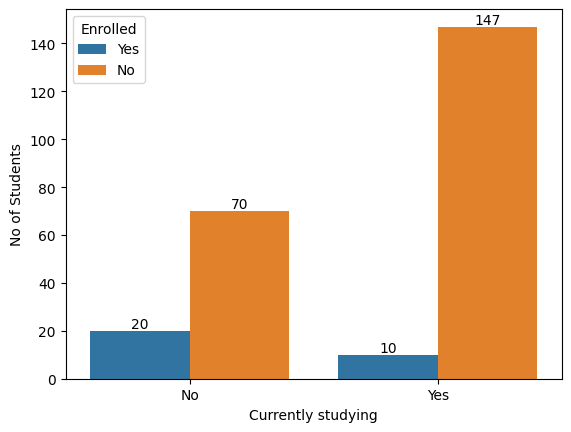

In [8]:
g=sns.countplot(x="Currently studying", hue="Enrolled",data=df)
for container_i in g.containers:
    g.bar_label(container_i)
plt.ylabel("No of Students")

### Percentage of Students who have enrolled with respect to Studying in Universities/Colleges

In [9]:
num=df.loc[(df["Currently studying"]=="No") & (df["Enrolled"]=="Yes"),"Enrolled"].count()
denom=df.loc[(df["Currently studying"]=="No") ,"Enrolled"].count()
percent_student_enrolled_not_study= (num/denom)*100
print("Percentage of Students who have enrolled and not Studying > ",percent_student_enrolled_not_study,"%")

num=df.loc[(df["Currently studying"]=="Yes") & (df["Enrolled"]=="Yes"),"Enrolled"].count()
denom=df.loc[(df["Currently studying"]=="Yes") ,"Enrolled"].count()
percent_student_enrolled_study= (num/denom)*100
print("Percentage of Students who have enrolled and Studying > ",percent_student_enrolled_study,"%")


Percentage of Students who have enrolled and not Studying >  22.22222222222222 %
Percentage of Students who have enrolled and Studying >  6.369426751592357 %


### Visulize percentage of students (no of people who enrolled in the course/ people who are currently students), (no of people who enrolled in course/people who are not students)

Text(0.5, 0, 'Percentage(%)')

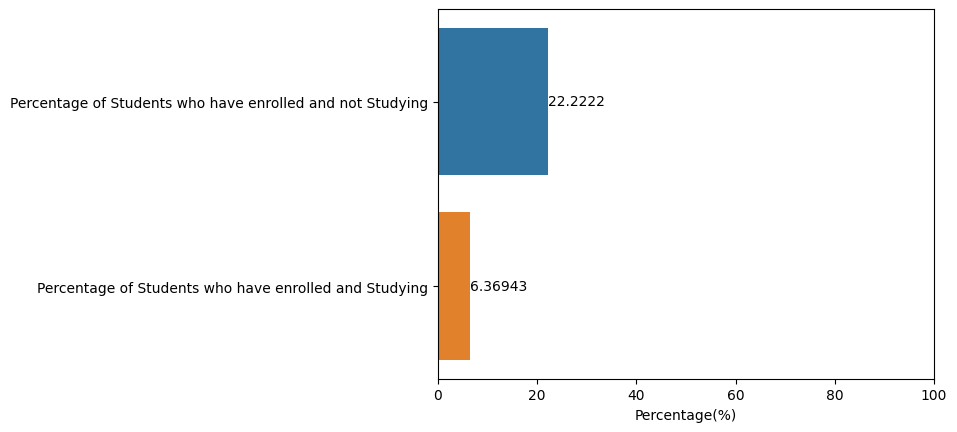

In [10]:
x = ["Percentage of Students who have enrolled and not Studying", "Percentage of Students who have enrolled and Studying"]
y = [percent_student_enrolled_not_study, percent_student_enrolled_study]
g=sns.barplot(x=y,y=x)
for container_i in g.containers:
    g.bar_label(container_i)
plt.xlim(0,100)
plt.xlabel("Percentage(%)")

## Enrollment with respect to Gender

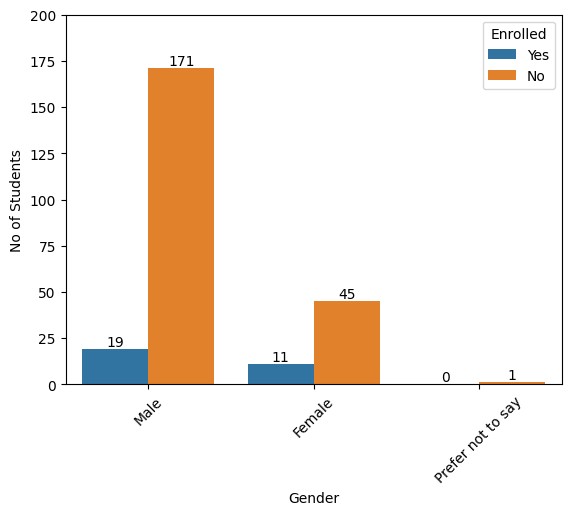

In [11]:


g=sns.countplot(x="Gender",hue="Enrolled", data=df)
plt.ylim(0,200)
plt.xticks(rotation=45)
plt.ylabel("No of Students")
for container_i in g.containers:
    g.bar_label(container_i)

## Age Density with respect to Enrollment status

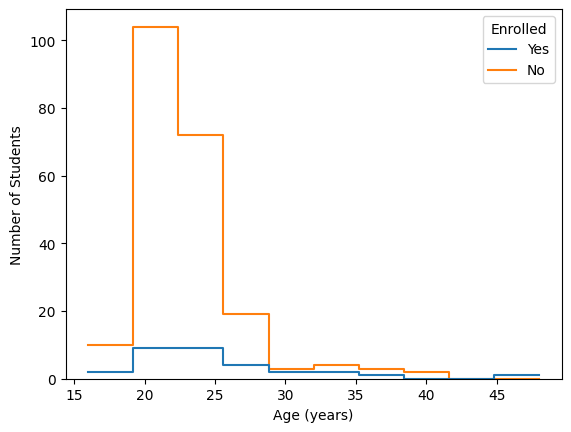

In [12]:
sns.histplot(data=df,x="Age",hue="Enrolled",fill=False,bins=10,element="step")
plt.xlabel("Age (years)")
plt.ylabel("Number of Students")
plt.show()

# Machine Learning Algorithms


## Pre Processing

In [14]:

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
lab= LabelEncoder()
dfn=pd.DataFrame()
df=df.dropna(axis=1)      # Removing "Payment receipt sent", "Do you have Linkedin account", "Any Feedback", "Course Fee email "
df=df.drop(["Primary Reason for taking this course?","Payment"],axis=1) 
dfn = df.drop(["Id","Date","Age"],axis=1).apply(lambda x: d[x.name].fit_transform(x))
#dfn=dfn.astype('category')
dfn["Age"]=df["Age"]

## Logistic curve between "Enrolled" and "Currently Studying"

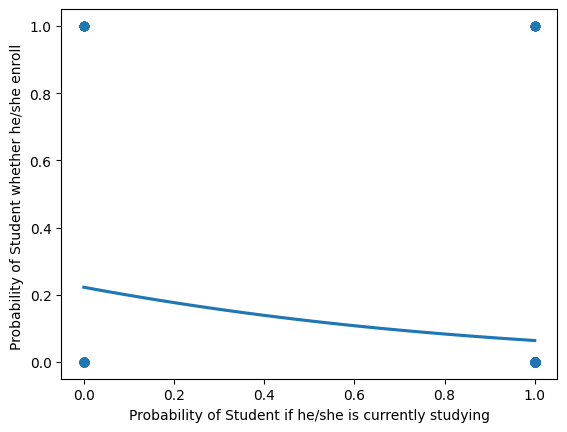

In [15]:
sns.regplot(x="Currently studying",y="Enrolled",data=dfn, ci=None, logistic=True)
plt.xlabel("Probability of Student if he/she is currently studying")
plt.ylabel("Probability of Student whether he/she enroll ")
plt.show()


## Logistic Regression 

c:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


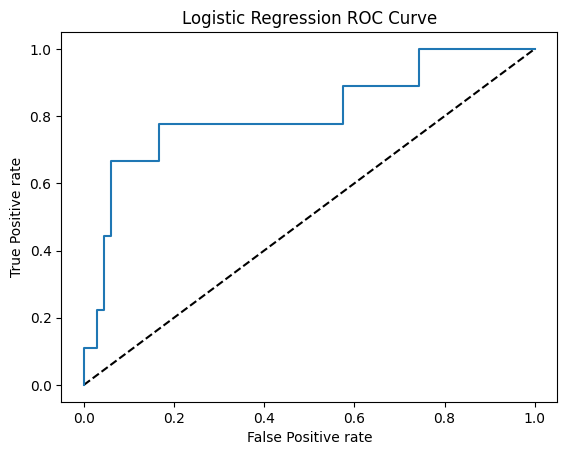

ROC AUC Score of the Logistic model =  80.8080808080808
Classification Report of Logistic Regression Model 

               precision    recall  f1-score   support

           0       0.90      0.97      0.93        66
           1       0.50      0.22      0.31         9

    accuracy                           0.88        75
   macro avg       0.70      0.60      0.62        75
weighted avg       0.85      0.88      0.86        75

Accuracy of Logistic Regression =  88.0  %
Confusion Matrix of Logistic Regression model 

 [[64  2]
 [ 7  2]]


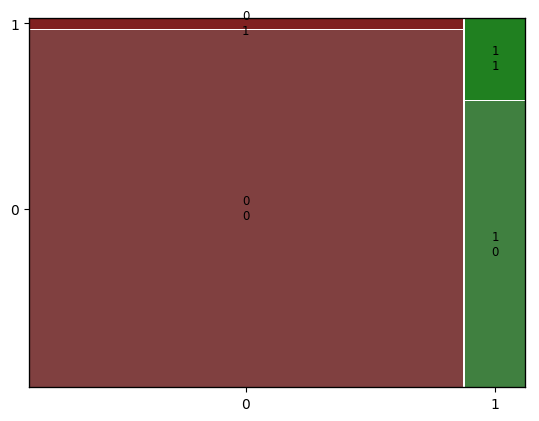

In [16]:
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
seed=123
from sklearn.metrics import roc_curve ,roc_auc_score
X=dfn.drop("Enrolled",axis=1)
y=dfn["Enrolled"]
X_train, X_test , y_train , y_test =train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
y_pred_prob=logreg.predict_proba(X_test)[:,1]

fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("Logistic Regression ROC Curve")
plt.show()
print("ROC AUC Score of the Logistic model = ",roc_auc_score(y_test,y_pred_prob)*100)

cf_logr=confusion_matrix(y_test,y_pred)
mosaic(cf_logr)
class_report_logr=classification_report(y_test,y_pred)

accuracy_logr=accuracy_score(y_test,y_pred)
print("Classification Report of Logistic Regression Model \n\n",class_report_logr)
print("Accuracy of Logistic Regression = ",accuracy_logr*100," %")
print("Confusion Matrix of Logistic Regression model \n\n",cf_logr)



### Exporting Predicted data to 'csv' file 

In [17]:
y_test=d["Enrolled"].inverse_transform(y_test)
y_train=d["Enrolled"].inverse_transform(y_train)
y_pred=d["Enrolled"].inverse_transform(y_pred)
df_logreg=pd.DataFrame({"Enrolled_test":list(y_test),"Enrolled_pred":list(y_pred)})
df_logreg.to_csv("LogisticRegression_prediction.csv")
print("Dataframe of Logistic Regression predicting University \n\n",tabulate(df_logreg, headers='keys', tablefmt='psql'))

Dataframe of Logistic Regression predicting University 

 +----+-----------------+-----------------+
|    | Enrolled_test   | Enrolled_pred   |
|----+-----------------+-----------------|
|  0 | No              | No              |
|  1 | Yes             | No              |
|  2 | Yes             | No              |
|  3 | No              | No              |
|  4 | No              | Yes             |
|  5 | No              | No              |
|  6 | No              | No              |
|  7 | No              | No              |
|  8 | No              | No              |
|  9 | No              | No              |
| 10 | No              | No              |
| 11 | No              | No              |
| 12 | No              | No              |
| 13 | No              | No              |
| 14 | No              | No              |
| 15 | No              | No              |
| 16 | No              | No              |
| 17 | No              | No              |
| 18 | No              | No            

## Checking linearity of Features with "Enrolled" as target variable

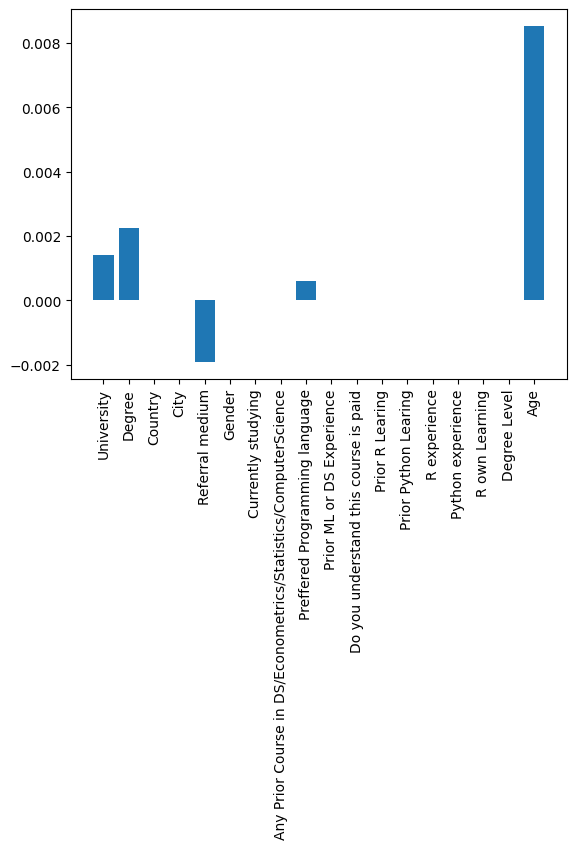

In [18]:
from sklearn.linear_model import Lasso
X=dfn.drop("Enrolled",axis=1).values
y=dfn["Enrolled"].values
names= dfn.drop("Enrolled",axis=1).columns
lasso =Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_
plt.bar(names,lasso_coef)
plt.xticks(rotation=90)
plt.show()

## Checking linearity of Features with "University" as target variable

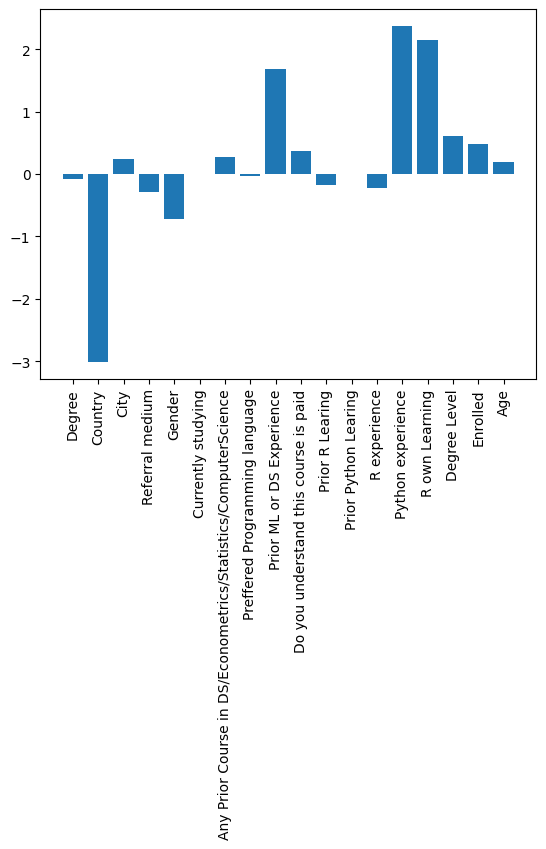

In [19]:
from sklearn.linear_model import Lasso
X=dfn.drop("University",axis=1).values
y=dfn["University"].values
names= dfn.drop("University",axis=1).columns
lasso =Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_
plt.bar(names,lasso_coef)
plt.xticks(rotation=90)
plt.show()

## K-Nearst Neighbours

### Model Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
X= dfn.drop("University",axis=1)
y=dfn["University"]
seed=123
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=seed)

knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
dfp=pd.DataFrame()

y_pred=knn.predict(X_test)

print("Accuracy of the model= ",accuracy_score(y_test,y_pred)*100)



Accuracy of the model=  32.0


### Quantifying number of neighbours

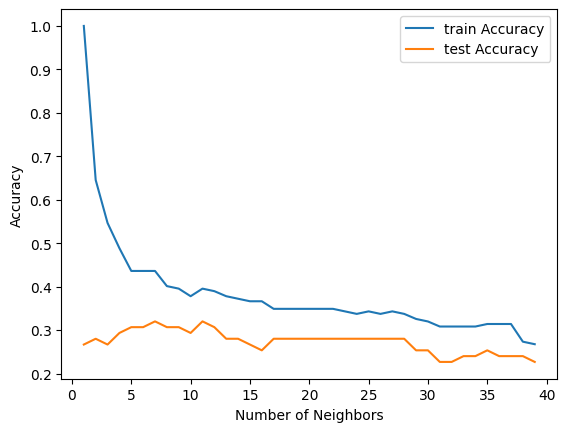

In [21]:
import matplotlib.pyplot as plt
train_accuracies= {}
test_accuracies={}
neighbors = np.arange(1,40)

for neighbor in neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor]=knn.score(X_train,y_train)
    test_accuracies[neighbor]=knn.score(X_test,y_test)

plt.plot(neighbors,train_accuracies.values(),label="train Accuracy")
plt.plot(neighbors,test_accuracies.values(),label="test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

### Confusion Matrix 

In [22]:
import sys
import numpy
from tabulate import tabulate # To prettify dataframe output
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import classification_report , confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
cf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
print("Confusion Matrix   ","(Shape =",cf_matrix.shape,")\n\n",cf_matrix)
print('Classification_report \n\n',class_report)

Confusion Matrix    (Shape = (29, 29) )

 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  1  0 

c:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qasim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Exporting Predicted data to 'csv' file 

In [23]:
y_test=d["University"].inverse_transform(y_test)
y_train=d["University"].inverse_transform(y_train)
y_pred=d["University"].inverse_transform(y_pred)
df_kn=pd.DataFrame({"University_test":list(y_test),"University_pred":list(y_pred)})
df_kn.to_csv("K-n_Neighbor_prediction.csv")

print("Dataframe of K-Neighbors Model predicting University\n\n",tabulate(df_kn, headers='keys', tablefmt='psql'))

Dataframe of K-Neighbors Model predicting University

 +----+-----------------------------------------+-------------------+
|    | University_test                         | University_pred   |
|----+-----------------------------------------+-------------------|
|  0 | IBA                                     | IBA               |
|  1 | IQRA                                    | IBA               |
|  2 | QU                                      | IBA               |
|  3 | IBA                                     | IBA               |
|  4 | IBA                                     | IBA               |
|  5 | SirSyed                                 | SirSyed           |
|  6 | IBA                                     | IQRA              |
|  7 | SirSyed                                 | IBA               |
|  8 | SSUET                                   | SMIU              |
|  9 | IQRA                                    | IQRA              |
| 10 | IBA                                     |

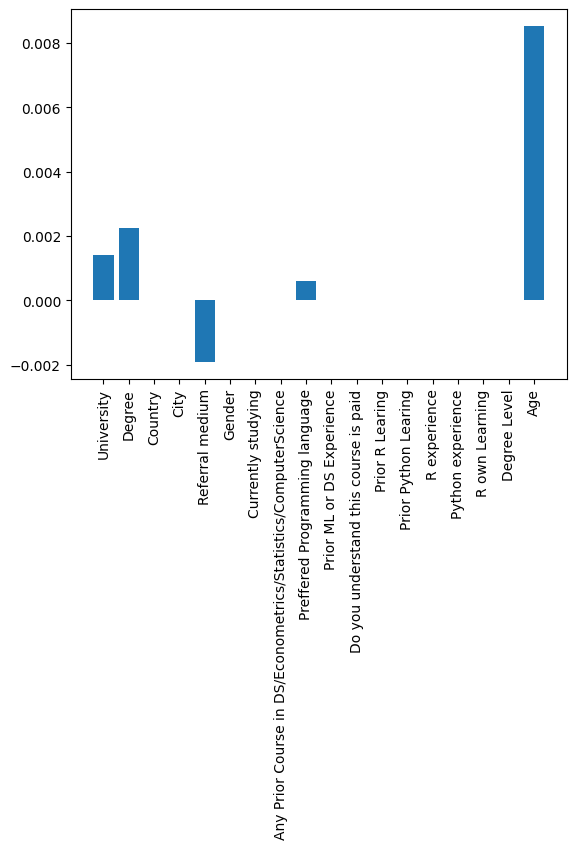

In [24]:
from sklearn.linear_model import Lasso
X=dfn.drop("Enrolled",axis=1).values
y=dfn["Enrolled"].values
names= dfn.drop("Enrolled",axis=1).columns
lasso =Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_
plt.bar(names,lasso_coef)
plt.xticks(rotation=90)
plt.show()

## Decision-Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

X=dfn.drop("Age",axis=1)
y=dfn["Age"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=seed)
dtr= DecisionTreeRegressor(max_depth=4,random_state=seed, min_samples_leaf=0.1)

dtr.fit(X_train,y_train)
y_pred= dtr.predict(X_test)
#np.round(y_pred).astype(int)


mse_error = MSE(y_test,y_pred)
rmse_error = (mse_error**(1/2))
print(rmse_error)


4.150293691432968


### Exporting Predicted data to 'csv' file 

In [26]:
df_dtree_reg=pd.DataFrame({"Age_test":list(y_test),"Age_pred":list(y_pred)})
df_dtree_reg.to_csv("Decision_tree_reg_prediction.csv")

### PLotting Predicted data of Decision Tree Regression

<function matplotlib.pyplot.show(close=None, block=None)>

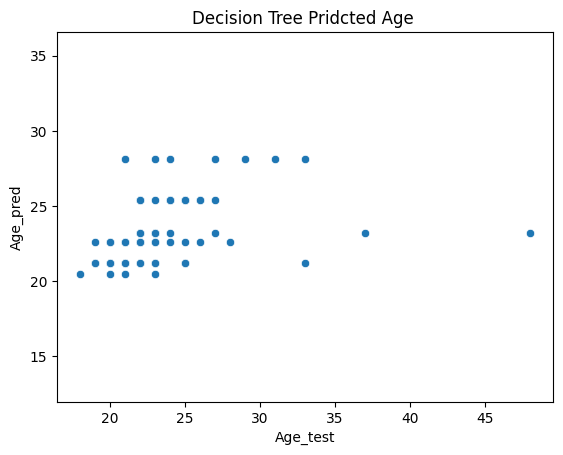

In [27]:
sns.scatterplot(data=df_dtree_reg,x="Age_test",y="Age_pred")
plt.title("Decision Tree Pridcted Age ")
plt.axis("equal")
plt.show

## Random Forrest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed=123

X=dfn.drop("Age",axis=1)
y=dfn["Age"]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=seed)

rf=RandomForestRegressor(n_estimators=10,min_samples_leaf=0.1,random_state=seed)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
MSE(y_test,y_pred)**(1/2)



4.097640575145502

### Exporting Predicted data to 'csv' file 

In [29]:
df_rf=pd.DataFrame({"Age_test":list(y_test),"Age_pred":list(y_pred)})
df_rf.to_csv("Random_Forrest_prediction.csv")

### PLotting Predicted data of Random Forrest

<function matplotlib.pyplot.show(close=None, block=None)>

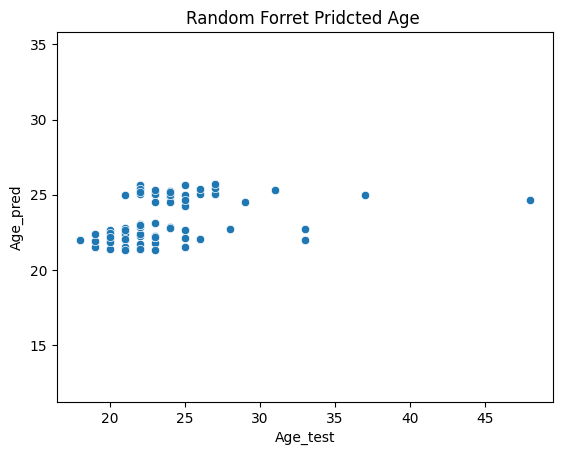

In [30]:
sns.scatterplot(data=df_rf,x="Age_test",y="Age_pred")
plt.title("Random Forret Pridcted Age ")
plt.axis("equal")
plt.show